# Preprocesamiento de la data

---
Antes de comenzar con el diseño de los modelos es importante enfocarse en el preprocesamiento de la data a utilizar.

El conjunto CIFAR-100 con el cual se entrenará el modelo consiste en 60000 imágenes, donde se tiene:
- **Dimensión de las imágenes:** 32x32x3
- **Tamaño del conjunto de entrenamiento:** 50000
- **Tamaño del conjunto de prueba:** 10000
- **Número de clases:** 100
- **Imágenes por clase en el conjunto de entrenamiento:** 500


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
import functions

In [ ]:
# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
# Obsevar el tamaño de los conjuntos de data
print('Train: images = %s, labels = %s' % (train_images.shape, train_labels.shape))
print('Test: images = %s, labeles = %s' % (test_images.shape, test_labels.shape))

Train: images = (50000, 32, 32, 3), labels = (50000, 1)
Test: images = (10000, 32, 32, 3), labeles = (10000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


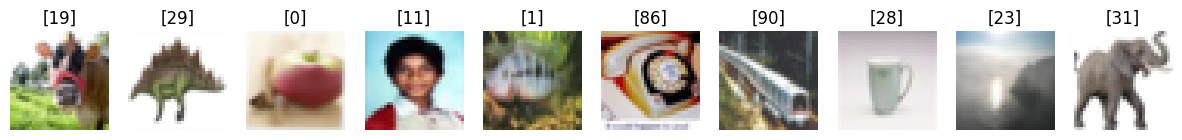

In [ ]:
# Observar muestra de la data
fig = plt.figure(figsize =(15, 4))
for i in range(10):
  # define subplot
  plt.subplot(1, 10, i+1)
  # plot raw pixel data
  plt.axis('off')
  plt.title(train_labels[i])
  plt.imshow(train_images[i])
# show the figure
plt.show()

Debemos verificar si la data está uniformemente distribuída entre las 100 clases, ya que de lo contrario, el entrenamiento del modelo puede verse afectado; si la diferencia entre la cantidad de imágenes por clases es muy grande, el modelo tendrá mejores resultados con las clases que tengan mayor cantidad de imágenes de entrenamiento. 

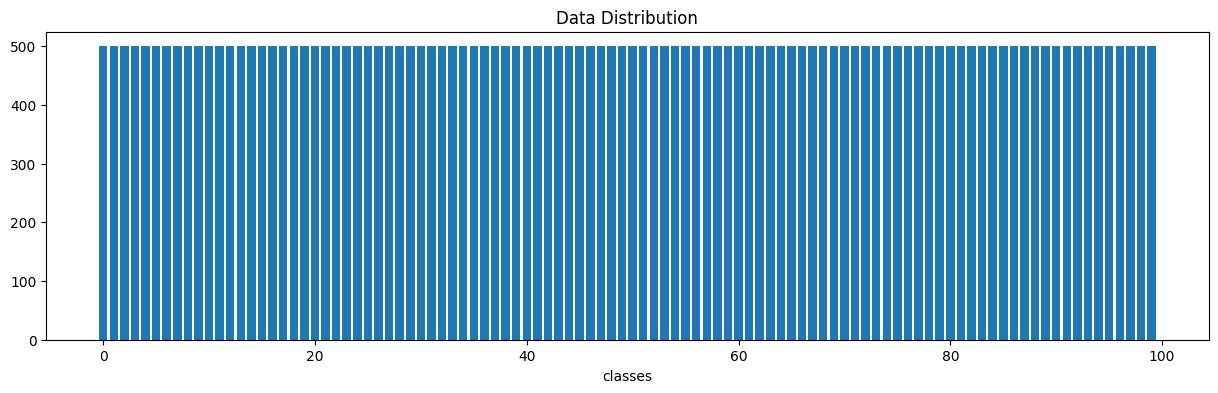

In [ ]:
# Observar la distribución de la data
values = train_labels.flatten().tolist()
distribution = {}
for i in range(100):
  distribution[i]=0
  for j in range(len(values)):
    if i == values[j]:
      distribution[i] = distribution[i]+1

fig = plt.figure(figsize =(15, 4))
plt.bar(list(distribution.keys()),list(distribution.values()))
plt.title('Data Distribution')
plt.xlabel('classes')
plt.show()

Vemos que la data está uniformemente distribuída entre las clases como se deseaba y como indicaba el conjunto de datos.

Generalmente en el preprocesamiento se busca uniformizar la data, es decir, redimensionar las imágenes para que todas tengan el mismo tamaño y de manera que todas las imágenes puedan ser entradas de una misma red. Sin embargo, en el CIFAR-100 ya todas las imagenes poseen las mismas dimensiones y no es necesario modificarlas; simplemente se debe adaptar el modelo de la red a esas dimensiones.

Por otra parte, para mejorar el rendimiento de los modelos, se recomienda utilizar la data normalizada y con una distribución uniforme entre las clases. Como la data son arreglos con valores entre 0 y 255, para normalizarla entre valores de 0 y 1 solo se debe dividir entre el valor máximo (255).

Finalmente, también es necesario codificar las etiquetas de la data. En vez de tener una clasificación categórica (valores entre 0 y 99), se busca que cada etiqueta tenga el estado respecto a todas las clases.

In [ ]:
# Normalización
train_images = functions.normalize(train_images)
test_images = functions.normalize(test_images)

# Codificación
train_labels = functions.encode(train_labels, 100)
test_labels = functions.encode(test_labels, 100)

In [ ]:
test_labels.shape

TensorShape([10000, 100])

In [ ]:
#Salvar la data preprocesada
np.savez('data.npz', trainX=train_images, trainY=train_labels, testX=test_images, testY=test_labels)